# 0. Setup

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

sys.path.append("..")

import arcadia_pycolor as apc

apc.mpl.setup()
apc.plotly.setup()

# 1. Stacked bar chart with `matplotlib`

/Users/wasim/Documents/arcadia-pycolor/arcadia_pycolor/mpl.py:229: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels)


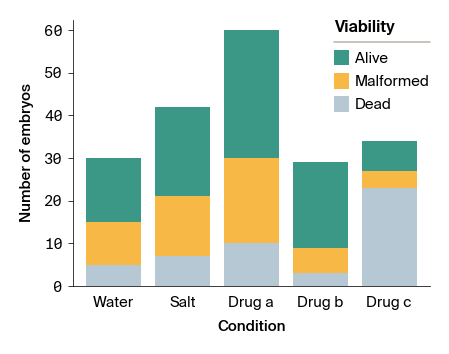

In [2]:
categories = ["Water", "Salt", "Drug A", "Drug B", "Drug C"]
subcategories = ["Dead", "Malformed", "Alive"]
data = np.array(
    [
        [5, 10, 15],
        [7, 14, 21],
        [10, 20, 30],
        [3, 6, 20],
        [23, 4, 7],
    ]
)

fig, ax = plt.subplots()

# Initialize the bottom array to 0
bottom = np.zeros(len(categories))

colors = [apc.denim, apc.canary, apc.seaweed]

# Loop through each subcategory and plot
for i in range(len(subcategories)):
    ax.bar(categories, data[:, i], bottom=bottom, label=subcategories[i], color=colors[i])
    bottom += data[:, i]

ax.set_xlabel("Condition")
ax.set_ylabel("Number of embryos")

legend = ax.legend()
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels))
ax.get_legend().set_title("Viability")

apc.mpl.style_plot(ax, categorical_axes="x", monospaced_axes="y")

# Show the plot
plt.show()

# 2. Stacked bar chart with `plotly`

In [3]:
df = pd.DataFrame(data, columns=subcategories)
df["Categories"] = categories

fig = px.bar(
    df,
    x="Categories",
    y=subcategories,
    color_discrete_map={
        "Alive": apc.seaweed.hex_code,
        "Malformed": apc.canary.hex_code,
        "Dead": apc.denim.hex_code,
    },
)
fig.update_layout(
    xaxis_title="Condition",
    yaxis_title="Number of embryos",
)
apc.plotly.set_yticklabel_monospaced(fig)
apc.plotly.add_commas_to_axis_tick_labels(fig)
fig.show()